In [120]:
import pandas as pd
import numpy as np
import os

In [8]:
train_data = pd.read_csv('../rawdata/train.csv', index_col='PassengerId')
test_data = pd.read_csv('../rawdata/test.csv', index_col='PassengerId')

In [9]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
%matplotlib inline  

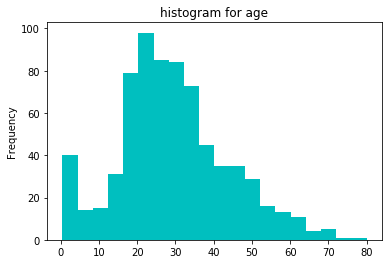

In [19]:
train_data.Age.plot(kind='hist', title='histogram for age', color='c', bins=20);

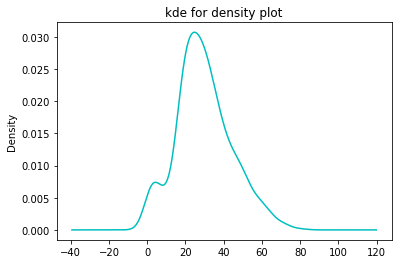

In [21]:
train_data.Age.plot(kind='kde', title='kde for density plot', color='c');

In [22]:
train_data.groupby('Sex').Age.median() # using the groupby function for pandas

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [23]:
train_data.groupby('Pclass').Fare.median() #median fare for the different passenger classes

Pclass
1    60.2875
2    14.2500
3     8.0500
Name: Fare, dtype: float64

In [24]:
train_data.groupby('Pclass').Age.median() #median age for the different passenger classes

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [27]:
#Using groupby to get medians for age and fares
train_data.groupby('Pclass')['Age', 'Fare'].median()

,Age,Fare
Pclass,,
1,37.0,60.2875
2,29.0,14.2500
3,24.0,8.0500


In [29]:
#using aggregations to get median for age and mean for fare
train_data.groupby('Pclass').agg({'Age': 'median', 'Fare': 'mean'})

,Age,Fare
Pclass,,
1,37.0,84.154687
2,29.0,20.662183
3,24.0,13.675550


In [37]:
train_data.groupby(['Pclass', 'Embarked']).Fare.median()   

Pclass  Embarked
1       C           78.2667
        Q           90.0000
        S           52.0000
2       C           24.0000
        Q           12.3500
        S           13.5000
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [38]:
train_data.groupby(['Pclass', 'Embarked']).Fare.median().unstack()

Embarked,C,Q,S
Pclass,,,
1,78.2667,90.00,52.00
2,24.0000,12.35,13.50
3,7.8958,7.75,8.05


In [33]:
#crosstabs to get quick insights
pd.crosstab(train_data.Sex, train_data.Pclass)

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


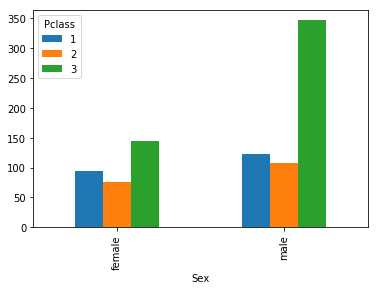

In [34]:
pd.crosstab(train_data.Sex, train_data.Pclass).plot(kind='bar');

In [35]:
#pivot tables
train_data.pivot_table(index='Sex', columns='Pclass', values='Age', aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


In [39]:
# fill missing data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [41]:
train_data[train_data.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [42]:
# value_counts to return well separated
train_data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [43]:
# pick those that survived and where they embarked.
pd.crosstab(train_data.Survived, train_data.Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [44]:
# how to replace missing values i.e  train_data.Embarked.fillna('S', inplace=True). S is the value to fill out and
# inplace creates a new dataframe if set true or uses the current dataframe if set to false.

In [45]:
train_data.Embarked.fillna('C', inplace=True)

In [47]:
train_data[train_data.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [49]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [50]:
#replace missing age
train_data[train_data.Age.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C


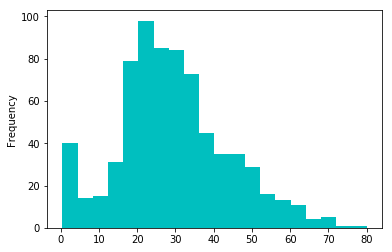

In [54]:
train_data.Age.plot(kind='hist', color='c', bins=20);

In [63]:
train_data.groupby('Sex').Age.median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

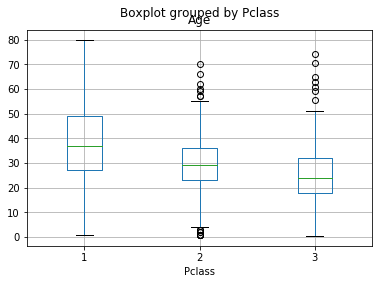

In [60]:
train_data[train_data.Age.notnull()].boxplot('Age', 'Pclass');

In [61]:
train_data.Age.mean()

29.69911764705882

In [70]:
# filling out missing ages with the help of titles
def GetTitle(name):
    name_with_title = name.split(',')[1]
    title = name_with_title.split('.')[0]
    return title.strip().lower()

In [66]:
train_data.Name.map(lambda x : GetTitle(x)).unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer'], dtype=object)

In [69]:
train_data.Name.map(lambda x : GetTitle(x)).value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Jonkheer          1
Capt              1
Mme               1
Don               1
Lady              1
Sir               1
the Countess      1
Ms                1
Name: Name, dtype: int64

In [81]:
def GetTitle(name):
    title_group = {
        'mr' : 'Mr',
        'miss' : 'Miss',
        'mrs' : 'Mrs',
        'master' : 'Master',
        'dr' : 'Dr',
        'rev' : 'Sir',
        'major' : 'Officer',
        'mlle' : 'Miss',
        'col' : 'Officer',
        'jonkheer'  : 'Sir',
        'mme' : 'Mrs',
        'don' : 'Sir',
        'capt' : 'Officer',
        'lady' : 'Miss',
        'sir' : 'Sir',
        'the countess' : 'Miss',
        'ms' : 'Miss'
    }
    name_with_title = name.split(',')[1]
    title = name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

In [82]:
train_data.Name.map(lambda x : GetTitle(x)).value_counts()

Mr         517
Miss       187
Mrs        126
Master      40
Sir          9
Dr           7
Officer      5
Name: Name, dtype: int64

In [83]:
#add a new title field to the dataframe
train_data['Title'] = train_data.Name.map(lambda x : GetTitle(x))

In [84]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


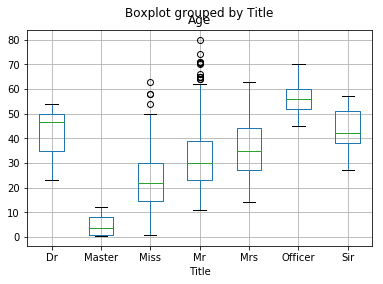

In [85]:
train_data[train_data.Age.notnull()].boxplot('Age', 'Title');

In [86]:
#Replace missing age based on title.
title_age_median = train_data.groupby('Title').Age.transform('median')
train_data.Age.fillna(title_age_median, inplace=True)

In [91]:
train_data.loc[train_data.Age>70]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,Mr
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,Mr
494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,Mr
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,Mr
852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,Mr


In [92]:
train_data.loc[train_data.Fare ==  train_data.Fare.max()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Miss
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Mr


In [94]:
###Feature Engineering

In [96]:
#Age state whether Adult or Child
train_data['AgeState'] = np.where(train_data['Age'] >= 18, 'Adult', 'Child')

In [98]:
train_data.AgeState.value_counts()

Adult    774
Child    117
Name: AgeState, dtype: int64

In [101]:
pd.crosstab(train_data.Survived, train_data.AgeState)

AgeState,Adult,Child
Survived,,
0,495,54
1,279,63


In [104]:
## family size contributions
train_data['FamilySize'] = train_data.Parch + train_data.SibSp + 1

In [105]:
pd.crosstab(train_data.Survived, train_data.FamilySize)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


In [107]:
# checking passenger class relationship with family size
pd.crosstab(train_data.Pclass, train_data.FamilySize)

FamilySize,1,2,3,4,5,6,7,8,11
Pclass,,,,,,,,,
1,109,70,24,7,2,4,0,0,0
2,104,34,31,13,1,1,0,0,0
3,324,57,47,9,12,17,12,6,7


In [125]:
# check for passenger decks in relation survival
def get_deck(cabin):
    return np.where(pd.notnull(cabin), str(cabin)[0].upper(), 'Z')
train_data['Deck'] = train_data['Cabin'].map(lambda x : get_deck(x))

KeyError: 'Cabin'

In [109]:
train_data.Deck.value_counts()

Z    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Deck, dtype: int64

In [110]:
pd.crosstab(train_data.Survived, train_data.Deck)

Deck,A,B,C,D,E,F,G,T,Z
Survived,,,,,,,,,
0,8,12,24,8,8,5,2,1,481
1,7,35,35,25,24,8,2,0,206


In [111]:
# Encoding features

#Sex Encoding
train_data['IsMale'] = np.where(train_data.Sex == 'male', 1, 0)


In [112]:
# one hot encoding using the pandas get_dummies func
train_data = pd.get_dummies(train_data, columns=['Deck', 'Pclass', 'Title', 'Embarked', 'AgeState'])

In [114]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 35 columns):
Survived          891 non-null int64
Name              891 non-null object
Sex               891 non-null object
Age               891 non-null float64
SibSp             891 non-null int64
Parch             891 non-null int64
Ticket            891 non-null object
Fare              891 non-null float64
Cabin             204 non-null object
FamilySize        891 non-null int64
IsMale            891 non-null int64
Deck_A            891 non-null uint8
Deck_B            891 non-null uint8
Deck_C            891 non-null uint8
Deck_D            891 non-null uint8
Deck_E            891 non-null uint8
Deck_F            891 non-null uint8
Deck_G            891 non-null uint8
Deck_T            891 non-null uint8
Deck_Z            891 non-null uint8
Pclass_1          891 non-null uint8
Pclass_2          891 non-null uint8
Pclass_3          891 non-null uint8
Title_Dr          891 non-null uint8

In [115]:
train_data.drop(['Cabin', 'Name', 'Ticket', 'Parch', 'SibSp', 'Sex'], axis=1, inplace=True)

In [116]:
#reordering columns

columns = [column for column in train_data.columns if column != 'Survived']
columns = ['Survived'] + columns
train_data = train_data[columns]

In [118]:
 train_data.to_csv('../processed/train.csv')

In [123]:
## Script to automate 

In [132]:
%%writefile -a '../src/get_processed_data.py'
import os
import pandas as pd
import numpy as np


def read_data():
    # raw data
    train_df = pd.read_csv('../rawdata/train.csv', index_col='PassengerId')
    test_df = pd.read_csv('../rawdata/test.csv', index_col='PassengerId')
    test_df['Survived'] = -111
    df = pd.concat((train_df, test_df), axis=0)
    return df

def process_data(df):
    return(df
          # create title attribute
           .assign(Title = lambda x : x.Name.map(get_title))
           # missing values
           .pipe(fill_missing_values)
           # create age state either adult or child
           .assign(AgeState = lambda x : np.where(x.Age >=18, 'Adult', 'Child'))
           #family size
           .assign(FamilySize = lambda x : (x.Parch + x.SibSp + 1))
           # create deck feature
           .assign(Cabin = lambda x : np.where(x.Cabin == 'T', np.nan, x.Cabin))
           .assign(Deck = lambda x : x.Cabin.map(get_deck))
           # feature encoding
           .assign(IsMale = lambda x : np.where(x.Sex == 'male', 1, 0))
           .pipe(pd.get_dummies, columns=['Deck', 'Pclass', 'Title', 'Embarked', 'AgeState'])
           #drop missing columns
           .drop(['Cabin', 'Name', 'Ticket', 'Parch', 'SibSp', 'Sex'], axis=1)
           
           #re order columns
           .pipe(reorder_columns)
          )

def get_title(name):
    title_group = {
        'mr' : 'Mr',
        'miss' : 'Miss',
        'mrs' : 'Mrs',
        'master' : 'Master',
        'dr' : 'Dr',
        'rev' : 'Sir',
        'major' : 'Officer',
        'mlle' : 'Miss',
        'col' : 'Officer',
        'jonkheer'  : 'Sir',
        'mme' : 'Mrs',
        'don' : 'Sir',
        'capt' : 'Officer',
        'lady' : 'Miss',
        'sir' : 'Sir',
        'the countess' : 'Miss',
        'ms' : 'Miss',
        'dona' : 'Mrs'
    }
    name_with_title = name.split(',')[1]
    title = name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

def fill_missing_values(df):
    #embarked
    df.Embarked.fillna('C', inplace=True)
    #age
    title_age_median = df.groupby('Title').Age.transform('median')
    df.Age.fillna(title_age_median, inplace=True)
    #fare
    median_fare = df[(df.Pclass == 3) & (df.Embarked == 'S')]['Fare'].median()
    df.Fare.fillna(median_fare, inplace=True)
    return df

def reorder_columns(df):
    columns = [column for column in df.columns if column != 'Survived']
    columns = ['Survived'] + columns
    df = df[columns]
    return df

def get_deck(cabin):
    return np.where(pd.notnull(cabin), str(cabin)[0].upper(), 'Z')

def write_data(df):
    
    #training data
    df[df.Survived != -111].to_csv('../processed/train.csv')
    #test data
    columns = [column for column in df.columns if column != 'Survived']
    df[df.Survived == -111].to_csv('../processed/test.csv')
    return df
    

if __name__ == '__main__':
    df = read_data()
    df = process_data(df)
    df = write_data(df)
    
    
    
    

Writing ../src/get_processed_data.py
